# Assignment 6: Weather in Knock Airport
Author: Zoe McNamara Harlowe

### Part 1 (60%)

*Based on the dataset of Knock Airport Climate Data, plot:*

- *The temperature*
- *The mean temperature each day*
- *The mean temperature for each month*

In [17]:
# Imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt

In [6]:
# Filename & Data Directory
filename = "knock_weather.csv"
datadir = r"C:\Users\ZMH\OneDrive\Desktop\PFDA\data\\" # still can't get "../../data" working
fullpath = datadir + filename

# Read in CSV file
df = pd.read_csv(fullpath, skiprows=23)

print(df.columns)

Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt'],
      dtype='object')


C:\Users\ZMH\AppData\Local\Temp\ipykernel_7792\403217251.py:7: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fullpath, skiprows=23)


Cast df['date'] into a datetime object for resampling (Found this on https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html)

In [12]:
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M', errors='coerce')

df.set_index('date', inplace=True)
df.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7


In [13]:
print(df.index)

DatetimeIndex(['1996-04-10 14:00:00', '1996-07-31 08:00:00',
               '1996-07-31 09:00:00', '1996-07-31 10:00:00',
               '1996-07-31 11:00:00', '1996-07-31 12:00:00',
               '1996-07-31 13:00:00', '1996-07-31 14:00:00',
               '1996-07-31 15:00:00', '1996-07-31 16:00:00',
               ...
               '2025-10-31 15:00:00', '2025-10-31 16:00:00',
               '2025-10-31 17:00:00', '2025-10-31 18:00:00',
               '2025-10-31 19:00:00', '2025-10-31 20:00:00',
               '2025-10-31 21:00:00', '2025-10-31 22:00:00',
               '2025-10-31 23:00:00', '2025-11-01 00:00:00'],
              dtype='datetime64[ns]', name='date', length=256434, freq=None)


In [25]:
temp = df.iloc[:,3]
temp.head()

date
1996-04-10 14:00:00    11.5
1996-07-31 08:00:00    11.5
1996-07-31 09:00:00    11.6
1996-07-31 10:00:00    12.9
1996-07-31 11:00:00    14.5
Name: temp, dtype: float64

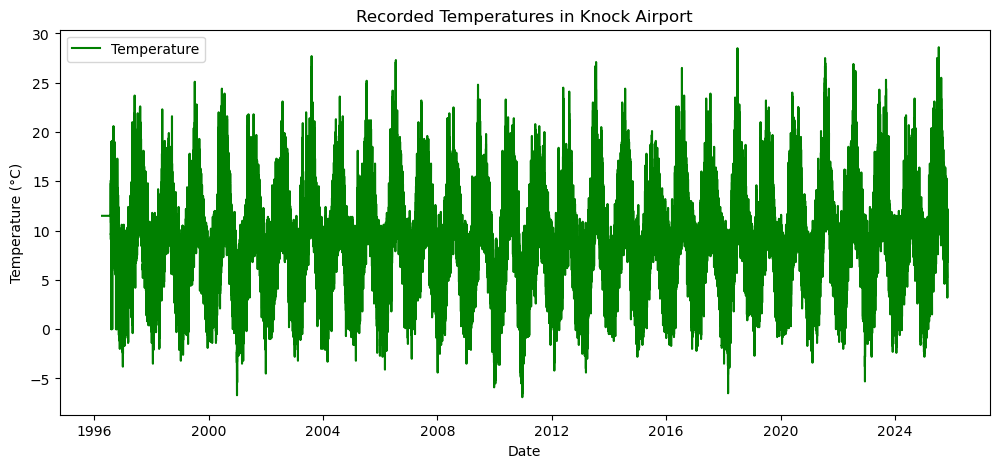

<Figure size 640x480 with 0 Axes>

In [36]:
plt.figure(figsize=(12,5))
plt.plot(df.index, temp, label='Temperature', color='green')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Recorded Temperatures in Knock Airport')
plt.legend()
plt.show()
plt.savefig("temp_knock_weather.png")

In [20]:
# Find daily average temp
daily_avg = df["temp"].resample("D").mean()

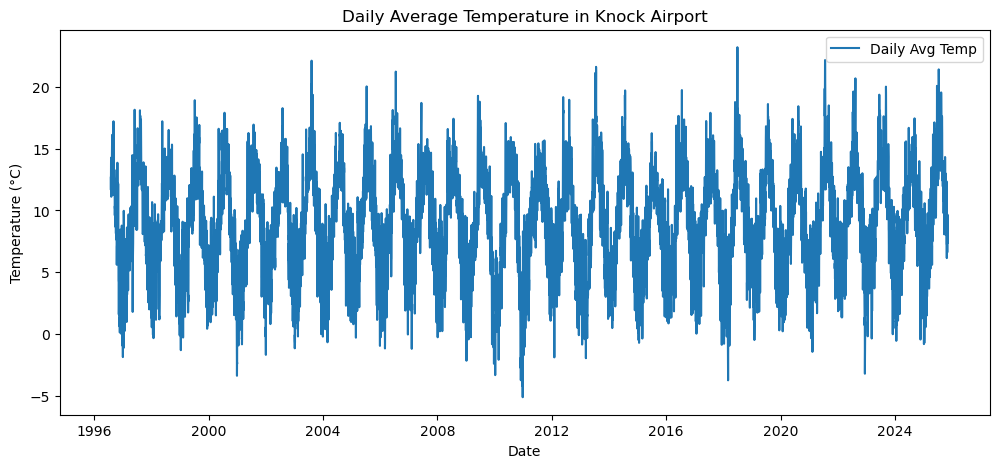

<Figure size 640x480 with 0 Axes>

In [37]:
# Plot daily mean temperature
plt.figure(figsize=(12,5))
plt.plot(daily_avg.index, daily_avg, label='Daily Avg Temp')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Average Temperature in Knock Airport')
plt.legend()
plt.show()
plt.savefig("daily_temp_knock_weather.png")


In [32]:
# Find monthly average temp
monthly_avg = df["temp"].resample("MS").mean()

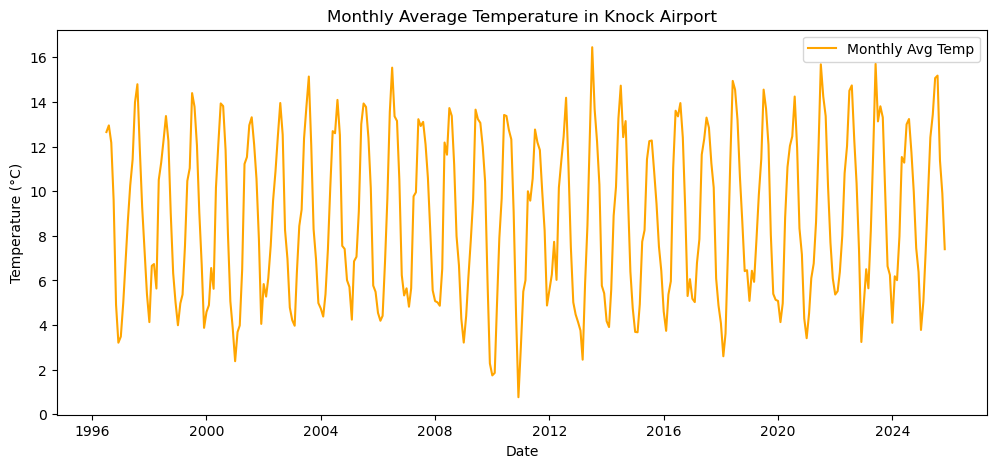

<Figure size 640x480 with 0 Axes>

In [38]:
# Plot monthly mean temperature
plt.figure(figsize=(12,5))
plt.plot(monthly_avg.index, monthly_avg, label='Monthly Avg Temp', color='orange')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Monthly Average Temperature in Knock Airport')
plt.legend()
plt.show()
plt.savefig("monthly_temp_knock_weather.png")

### Part 2 (40%)

*Plot:*

- *The Windspeed (there is data missing from this column)*
- *The rolling windspeed (say over 24 hours)*
- *The max windspeed for each day*
- *The monthly mean of the daily max windspeeds*